# Physics 641 - Homework 2

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024

### Problem 2. Changes in the entropy
#### Calculate the changes in entropy due to various methods of heating:

#### (a) One kilogram of water at $0^{\circ}$C is brought into contact with a heat bath at $90^{\circ}$C. What is the change in entropy of the water? What is the change in entropy of the bath? What is the change in entropy of the entire system consisting of both water and heat bath? (The specific heat of water is approximately 4184 J/kg K.)

#### (b) The water is heated from $0^{\circ}$C to $90^{\circ}$C by first bringing it into contact with a heat bath at $45^{\circ}$C and then with a heat bath at 90◦C. What is the change in entropy of the entire system?

#### (c) Discuss how the water can be heated from $0^{\circ}$C to $90^{\circ}$C without any change in entropy of the entire system.

In [1]:
'''Required Libraries'''
import matplotlib.pyplot as plt
import numpy as np

#### This cell defines constants given to solve the problems.

In [2]:
'''Constants'''
mass_water = 1.0  #mass of the water
c_water = 4184    #specific heat of water [J / kg K]
temp_init = 273   #initial temperature of the water [K]
temp_final = 363  #final temperature of the water [K]

#### This cell defines functions to calculate the change in entropy of the heat bath during thermal exchange with the water.

In [3]:
'''Function to calculate the change in entropy of the heat bath at a given temperature'''
def entropy(Q, T):
    deltaS = -Q / T
    return deltaS

#### (a) One kilogram of water at $0^{\circ}$C is brought into contact with a heat bath at $90^{\circ}$C. What is the change in entropy of the water? What is the change in entropy of the bath? What is the change in entropy of the entire system consisting of both water and heat bath? (The specific heat of water is approximately 4184 J/kg K.)

In [4]:
'''Change in entropy of the water during heating [J / K]'''
deltaS_water = mass_water * c_water * np.log(temp_final / temp_init)  #S = m * c * ln(Tf / Ti)

'''Change in entropy of the heat bath during heating [J / K]'''
Q_water = mass_water * c_water * (temp_final - temp_init)  #energy added to water through pure heating [J]
deltaS_bath = entropy(Q_water, temp_final)

'''Total change in entropy of the system during heating [J / K]'''
deltaS_total = deltaS_water + deltaS_bath  #entropy is an additive function

'''Printing the results'''
print(f'The change in entropy of the water is \u0394S = +{deltaS_water:.1f} J/K.')
print(f'The change in entropy of the heat bath is \u0394S = {deltaS_bath:.1f} J/K.')
print(f'The total change in entropy of the system is \u0394S = +{deltaS_total:.1f} J/K.')

The change in entropy of the water is ΔS = +1192.2 J/K.
The change in entropy of the heat bath is ΔS = -1037.4 J/K.
The total change in entropy of the system is ΔS = +154.8 J/K.


#### (b) The water is heated from $0^{\circ}$C to $90^{\circ}$C by first bringing it into contact with a heat bath at $45^{\circ}$C and then with a heat bath at 90◦C. What is the change in entropy of the entire system?

In [5]:
'''Note that the change in entropy of the water during heating is the same as in (a)'''
deltaS_water = mass_water * c_water * np.log(temp_final / temp_init)  #S = m * c * ln(Tf / Ti)

'''Temperature of the heat baths [K]'''
temp_bath1 = 318
temp_bath2 = 363

'''Change in entropy of the heat baths during heating [J / K]'''
Q_water = mass_water * c_water * (temp_final - temp_init) / 2  #energy added to water from each bath [J]
deltaS_bath1 = entropy(Q_water, temp_bath1)
deltaS_bath2 = entropy(Q_water, temp_bath2)

'''Total change in entropy of the system during heating [J / K]'''
deltaS_total = deltaS_water + deltaS_bath1 + deltaS_bath2  #entropy is an additive function

'''Printing the results'''
print(f'The change in entropy of the water is \u0394S = +{deltaS_water:.1f} J/K.')
print(f'The change in entropy of the first heat bath is \u0394S = {deltaS_bath1:.1f} J/K.')
print(f'The change in entropy of the second heat bath is \u0394S = {deltaS_bath2:.1f} J/K.')
print(f'The total change in entropy of the system is \u0394S = +{deltaS_total:.1f} J/K.')

The change in entropy of the water is ΔS = +1192.2 J/K.
The change in entropy of the first heat bath is ΔS = -592.1 J/K.
The change in entropy of the second heat bath is ΔS = -518.7 J/K.
The total change in entropy of the system is ΔS = +81.4 J/K.


#### (c) Discuss how the water can be heated from $0^{\circ}$C to $90^{\circ}$C without any change in entropy of the entire system.

##### We see that the total change in entropy of the system decreased from $\mathit{\Delta S = 154.8}$ J/K in (a) to $\mathit{\Delta S = 81.4}$ J/K in (b) when a second heat bath was used.  With the principle of mathematical Induction, if we add another heat bath at an equally-spaced temperature, then the total change in entropy of the system will again decrease.  If we have a sufficiently large number of heat baths at equally-spaced temperatures, then we will find that the total change in entropy of the system will approach zero.  Since the heat baths do not change temperature during pure heating, utilizing heat baths of approximately the same temperature of the water at each step will cause the change in entropy of the water and that of the heat bath to be of approximately the same magnitude.

The total change in entropy of the system for 1000 heat baths is ΔS = +0.2 J/K.


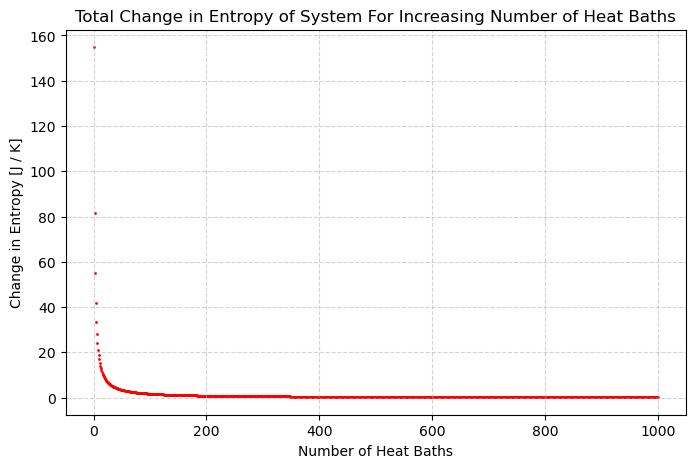

In [6]:
'''Note that the change in entropy of the water during heating is the same as in (a)'''
deltaS_water = mass_water * c_water * np.log(temp_final / temp_init)  #S = m * c * ln(Tf / Ti)

'''Total energy added to the water through pure heating from all of the heat baths [J]'''
Q_water = mass_water * c_water * (temp_final - temp_init)

'''Number of heat baths'''
num_baths = 1000

'''Store data of total change in entropy of the system and the number of baths used'''
deltaS_total_list = []
num_baths_list = []

'''Loop to calculate the total change in entropy of the system for an increasing number of heat baths'''
for num in range(1, num_baths + 1):
    
    '''Set initial conditions for the calculations'''
    deltaS_total = deltaS_water              #set initial total change in entropy of the system equal to that of the water
    Q = Q_water / num                        #energy added to water from each heat bath [J]
    deltaT = (temp_final - temp_init) / num  #change in temperature between each heat bath
    temp_baths_list = np.linspace(273 + deltaT, temp_final, num, endpoint = True)  #equally-spaced heat bath temperatures
    
    '''Arrange the temperature of each heat bath and calculate the change in entropy'''
    for temp in temp_baths_list:
        deltaS_bath = entropy(Q, temp)  #change in entropy of each heat bath
        deltaS_total += deltaS_bath     #deltaS_total = deltaS_water + deltaS_bath1 + deltaS_bath2 + ... + deltaS_bathn
        
    '''Append the data'''
    deltaS_total_list.append(deltaS_total)  
    num_baths_list.append(num)

'''Printing the results'''
print(f'The total change in entropy of the system for {num_baths} heat baths is \u0394S = +{deltaS_total_list[-1]:.1f} J/K.')

'''Plotting the results'''
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ax.set_xlabel('Number of Heat Baths')
ax.set_ylabel('Change in Entropy [J / K]')
ax.set_title('Total Change in Entropy of System For Increasing Number of Heat Baths')
ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax.scatter(num_baths_list, deltaS_total_list, s = 1, color = 'red')
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY641_HW2_Plot.png', bbox_inches = 'tight')